In [19]:
!pip install tensorflow

In [20]:
import os
import gzip
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from path"""
    labels_path = os.path.join(path,
                              '%s-labels-idx1-ubyte.gz'
                              % kind)
    images_path = os.path.join(path,
                              '%s-images-idx3-ubyte.gz'
                              % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                             offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                             offset=16).reshape(len(labels), 784)

    return images, labels

# Clone repository để lấy dữ liệu
!git clone https://github.com/zalandoresearch/fashion-mnist.git

# Load dữ liệu
X_train, y_train = load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = load_mnist('fashion-mnist/data/fashion', kind='t10k')

# In ra shape của dữ liệu
print('Training Data Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Data Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

# In ra một số thông tin về dữ liệu
print('\nThông tin dữ liệu:')
print('Giá trị pixel trong khoảng:', X_train.min(), 'đến', X_train.max())
print('Số lượng classes:', len(np.unique(y_train)))

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.
Training Data Shape: (60000, 784)
Training Labels Shape: (60000,)
Testing Data Shape: (10000, 784)
Testing Labels Shape: (10000,)

Thông tin dữ liệu:
Giá trị pixel trong khoảng: 0 đến 255
Số lượng classes: 10


Hiển thị ảnh đầu tiên:


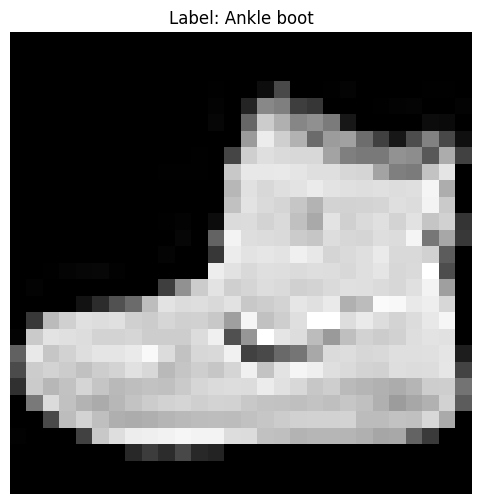


Hiển thị 100 ảnh liên tiếp:


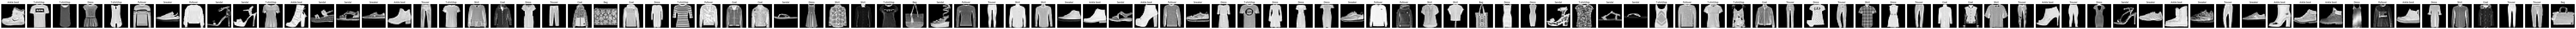


Hiển thị 100 ảnh ngẫu nhiên:


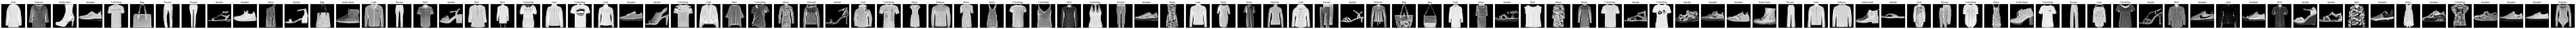


Hiển thị ảnh theo index:
Ảnh thứ 100:


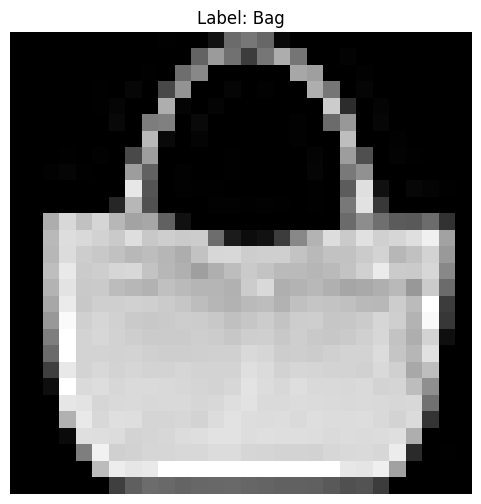

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Labels cho Fashion MNIST
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

def show_image(image, label=None, reshape=True):
    """Hiển thị một ảnh từ Fashion MNIST"""
    plt.figure(figsize=(6, 6))
    if reshape:
        # Reshape từ 784 về 28x28
        image = image.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    if label is not None:
        plt.title(f'Label: {label_dict[label]}')
    plt.axis('off')
    plt.show()

def show_multiple_images(images, labels, label_dict, num_images=100):
    # Kiểm tra xem num_images có lớn hơn số lượng hình ảnh không
    if num_images > len(images):
        num_images = len(images)

    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 3))

    for i in range(num_images):
        img = images[i].reshape(28, 28)  # Reshape ảnh từ mảng 1D 784 về 28x28
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'{label_dict[labels[i]]}')  # Đặt tiêu đề cho từng hình ảnh
        axes[i].axis('off')  # Tắt trục

    plt.tight_layout()
    plt.show()
# Load dữ liệu như đã làm trước đó
# ... (phần code load dữ liệu)

# Hiển thị một ảnh đơn lẻ
print("Hiển thị ảnh đầu tiên:")
show_image(X_train[0], y_train[0])

# Hiển thị 100 ảnh liên tiếp
print("\nHiển thị 100 ảnh liên tiếp:")
show_multiple_images(X_train[:100], y_train[:100],label_dict)

# Hiển thị 5 ảnh ngẫu nhiên
random_indices = np.random.randint(0, len(X_train), 100)
print("\nHiển thị 100 ảnh ngẫu nhiên:")
show_multiple_images(X_train[random_indices], y_train[random_indices],label_dict)

# Tạo chức năng để người dùng có thể xem ảnh theo index
def view_image_by_index(index):
    """Xem ảnh theo index cụ thể"""
    if 0 <= index < len(X_train):
        print(f"Ảnh thứ {index}:")
        show_image(X_train[index], y_train[index])
    else:
        print("Index không hợp lệ!")

# Ví dụ sử dụng:
print("\nHiển thị ảnh theo index:")
view_image_by_index(100)  # Hiển thị ảnh thứ 100

In [22]:
# Set random seed for reproducibility
np.random.seed(0)

# Get one image from training set and reshape to 28x28
img = X_train[0].reshape(28, 28)

# Print the pixel matrix
print("Pixel matrix of the image (28x28 size):")
print("Each number represents pixel intensity (0-255):")
print()

# Format output for better readability
for i in range(28):
    for j in range(28):
        # Print each pixel value with fixed width of 3 characters
        print(f"{int(img[i,j]):3d}", end=" ")
    print()  # New line after each row

Pixel matrix of the image (28x28 size):
Each number represents pixel intensity (0-255):

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0

In [23]:
reshaped_arr = X_train[0].reshape(28,28)
reshaped_arr


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [24]:
import numpy as np

# Bước 1: Kiểm tra kích thước dữ liệu
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Bước 2: Chuyển đổi dữ liệu 1D sang 2D
X_train_reshaped = X_train.reshape(-1, 28, 28)

# Bước 3: Chuẩn hóa dữ liệu
X_train_normalized = X_train_reshaped.astype('float32') / 255.0

# Bước 4: Kiểm tra giá trị nhãn
print("Unique labels in y_train:", np.unique(y_train))

# Bước 5: Xử lý giá trị bị thiếu (nếu có)
valid_indices = ~np.isnan(X_train).any(axis=1) & ~np.isnan(y_train)
X_train_cleaned = X_train[valid_indices]
y_train_cleaned = y_train[valid_indices]

# Bước 6: Kiểm tra kết quả
print("Cleaned shape of X_train:", X_train_cleaned.shape)
print("Cleaned shape of y_train:", y_train_cleaned.shape)


Shape of X_train: (60000, 784)
Shape of y_train: (60000,)
Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Cleaned shape of X_train: (60000, 784)
Cleaned shape of y_train: (60000,)


In [25]:
import pandas as pd

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(X_train)
df['label'] = y_train

# Kiểm tra các thông tin mô tả
print(df.describe())
print(df.info())

# Kiểm tra giá trị thiếu
print("Missing values in DataFrame:", df.isnull().sum().sum())


                  0             1             2             3             4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000800      0.005783      0.030083      0.103800      0.249683   
std        0.092554      0.249033      0.767868      2.512017      4.331376   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    119.000000    164.000000    224.000000   

                  5             6             7             8             9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.414717      0.821667      2.224733      5.698667     14.434650   
std        5.827394      8.309935     14.201820    

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,...,54,50,5,0,1,0,0,0,0,0


In [27]:
label_counts = df['label'].value_counts()
print(label_counts)



label
9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64


In [28]:
mean_pixel = np.mean(X_train)
std_pixel = np.std(X_train)

print(f'Mean pixel value: {mean_pixel:.2f}')
print(f'Standard deviation of pixel values: {std_pixel:.2f}')


Mean pixel value: 72.94
Standard deviation of pixel values: 90.02


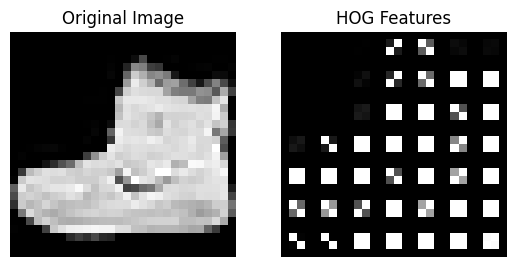

In [29]:
from skimage.feature import hog
from skimage import exposure

# Lấy đặc trưng HOG cho một hình ảnh
image = X_train[0].reshape(28, 28)  # Reshape về 2D
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(4, 4),
                     cells_per_block=(1, 1), visualize=True)

# Tăng cường độ tương phản của hình ảnh HOG
hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Features')
plt.axis('off')
plt.show()


In [30]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_epochs=100, batch_size=128):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.losses = []

    def sigmoid(self, z):
        """Hàm sigmoid"""
        # Clip để tránh overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, num_features, num_classes):
        """Khởi tạo weights và bias"""
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)

    def one_hot_encode(self, y):
        """Chuyển labels thành one-hot encoding"""
        n_classes = len(np.unique(y))
        return np.eye(n_classes)[y]

    def softmax(self, z):
        """Hàm softmax cho multi-class"""
        # Trừ max để tránh overflow
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def get_batches(self, X, y, batch_size):
        """Tạo các batch cho mini-batch gradient descent"""
        n_samples = len(X)
        indices = np.arange(n_samples)
        np.random.shuffle(indices)

        for i in range(0, n_samples, batch_size):
            batch_indices = indices[i:i + batch_size]
            yield X[batch_indices], y[batch_indices]

    def fit(self, X, y):
        """Huấn luyện mô hình"""
        # Chuẩn hóa dữ liệu
        X = X / 255.0

        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Khởi tạo parameters
        self.initialize_parameters(n_features, n_classes)

        # One-hot encode labels
        y_encoded = self.one_hot_encode(y)

        # Training loop
        for epoch in range(self.num_epochs):
            epoch_loss = 0
            batch_count = 0

            # Mini-batch gradient descent
            for batch_X, batch_y in self.get_batches(X, y_encoded, self.batch_size):
                # Forward pass
                z = np.dot(batch_X, self.weights) + self.bias
                y_pred = self.softmax(z)

                # Tính loss
                batch_loss = -np.mean(np.sum(batch_y * np.log(y_pred + 1e-15), axis=1))
                epoch_loss += batch_loss
                batch_count += 1

                # Backward pass
                d_y_pred = y_pred - batch_y

                # Gradient descent
                d_weights = np.dot(batch_X.T, d_y_pred) / len(batch_X)
                d_bias = np.mean(d_y_pred, axis=0)

                # Cập nhật parameters
                self.weights -= self.learning_rate * d_weights
                self.bias -= self.learning_rate * d_bias

            # Lưu loss trung bình của epoch
            epoch_loss /= batch_count
            self.losses.append(epoch_loss)

            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{self.num_epochs}], Loss: {epoch_loss:.4f}')

    def predict(self, X):
        """Dự đoán class cho dữ liệu mới"""
        # Chuẩn hóa dữ liệu
        X = X / 255.0

        # Forward pass
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(z)

        # Trả về class có xác suất cao nhất
        return np.argmax(y_pred, axis=1)

    def evaluate(self, X, y):
        """Đánh giá mô hình"""
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

# Sử dụng mô hình
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Khởi tạo mô hình
    model = LogisticRegression(
        learning_rate=0.1,
        num_epochs=200,
        batch_size=128
    )

    # Training
    print("Bắt đầu training...")
    model.fit(X_train, y_train)

    # Đánh giá
    train_accuracy = model.evaluate(X_train, y_train)
    test_accuracy = model.evaluate(X_test, y_test)

    print(f"\nKết quả:")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return model

# Chạy mô hình
model = train_and_evaluate_model(X_train, y_train, X_test, y_test)
y_pred = model.predict(X_test)

Bắt đầu training...
Epoch [10/200], Loss: 0.4265
Epoch [20/200], Loss: 0.4069
Epoch [30/200], Loss: 0.3965
Epoch [40/200], Loss: 0.3893
Epoch [50/200], Loss: 0.3861
Epoch [60/200], Loss: 0.3810
Epoch [70/200], Loss: 0.3791
Epoch [80/200], Loss: 0.3758
Epoch [90/200], Loss: 0.3740
Epoch [100/200], Loss: 0.3720
Epoch [110/200], Loss: 0.3716
Epoch [120/200], Loss: 0.3693
Epoch [130/200], Loss: 0.3680
Epoch [140/200], Loss: 0.3676
Epoch [150/200], Loss: 0.3664
Epoch [160/200], Loss: 0.3660
Epoch [170/200], Loss: 0.3647
Epoch [180/200], Loss: 0.3638
Epoch [190/200], Loss: 0.3622
Epoch [200/200], Loss: 0.3626

Kết quả:
Train Accuracy: 0.8773
Test Accuracy: 0.8426


**SCALE X_TRAIN VÀ X_TEST**

In [31]:
x_mean_train = np.mean(X_train / 255.0)
x_mean_test = np.mean(X_test / 255.0)
X_train_normalized = X_train / 255.0 - x_mean_train
X_test_normalized = X_test / 255.0 - x_mean_test

**MODEL LOGISTIC REGRESSION**

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
start_time_LG = time.time()
# Khởi tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_normalized, y_train)

# Dự đoán trên tập kiểm tra
y_pred_LG = model.predict(X_test_normalized)
end_time_LG = time.time()
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred_LG)
print(f'Accuracy: {accuracy * 100:.2f}%')
report = classification_report(y_test, y_pred_LG)
print(report)
time_LG=end_time_LG - start_time_LG
print(f'Thời gian chạy: {time_LG} giây')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 84.35%
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.72      0.74      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.74      0.76      0.75      1000
           5       0.95      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.93      1000
           8       0.93      0.94      0.93      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Thời gian chạy: 131.48897337913513 giây


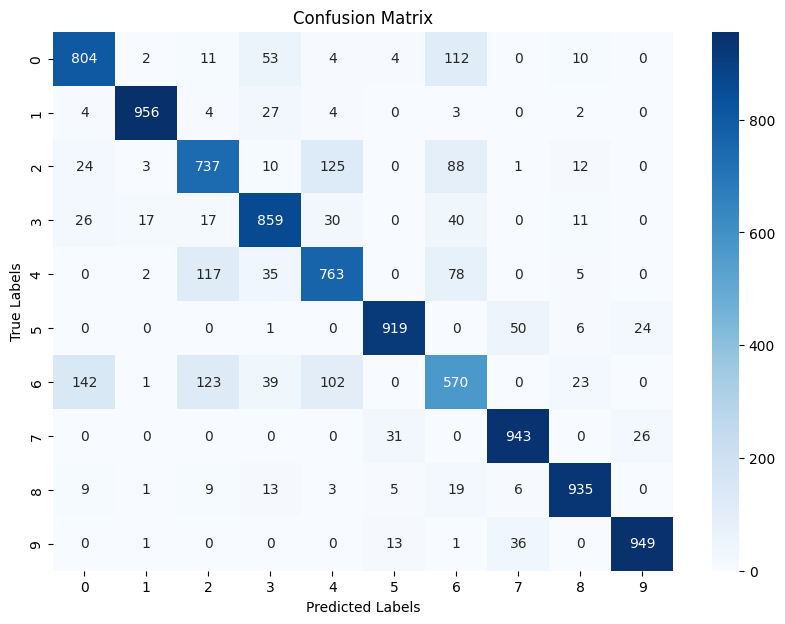

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression



# Tạo confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_LG)

# Vẽ confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


***HÀM PHÂN TÍCH PHẦN TRĂM SAI SỐ CỦA MỖI LABEL***

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_mismatches(y_test, y_pred, X_test):
    # Lấy các nhãn và hình ảnh dự đoán sai
    mismatched_labels = y_test[y_test != y_pred]
    mismatched_images = X_test[y_test != y_pred]
    mismatched_images = mismatched_images.reshape(-1, 28, 28)

    # Đếm số lượng nhãn duy nhất bị dự đoán sai
    unique_labels, counts = np.unique(mismatched_labels, return_counts=True)
    num_unique_labels = len(unique_labels)

    print(f"Số lượng nhãn khác biệt bị dự đoán sai: {num_unique_labels}")
    print(f"Các nhãn duy nhất bị dự đoán sai: {unique_labels}")
    print(f"Số lượng từng nhãn bị dự đoán sai: {counts}")

    # Tính phần trăm số lần dự đoán sai cho mỗi nhãn
    total_mismatches = np.sum(counts)  # Tổng số nhãn bị dự đoán sai
    percentages = (counts / total_mismatches) * 100  # Phần trăm dự đoán sai

    # Vẽ biểu đồ thanh ngang dựa trên phần trăm
    fig, ax = plt.subplots(figsize=(20, 8))  # Tăng chiều cao của biểu đồ
    ax.barh(unique_labels, percentages, color='#ff6200')

    # Thêm nhãn trục và tiêu đề
    ax.set_xlabel('Phần trăm dự đoán sai (%)')
    ax.set_ylabel('Nhãn')
    ax.set_title('Phần trăm dự đoán sai theo từng nhãn')

    # Chú thích phần trăm vào biểu đồ
    for i, (value, name) in enumerate(zip(percentages, unique_labels)):
        ax.text(value + 0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=12, color='black')

    # Sử dụng tight_layout để tự động điều chỉnh bố cục
    plt.tight_layout()

    # Hiển thị biểu đồ
    plt.show()


Số lượng nhãn khác biệt bị dự đoán sai: 10
Các nhãn duy nhất bị dự đoán sai: [0 1 2 3 4 5 6 7 8 9]
Số lượng từng nhãn bị dự đoán sai: [196  44 263 141 237  81 430  57  65  51]


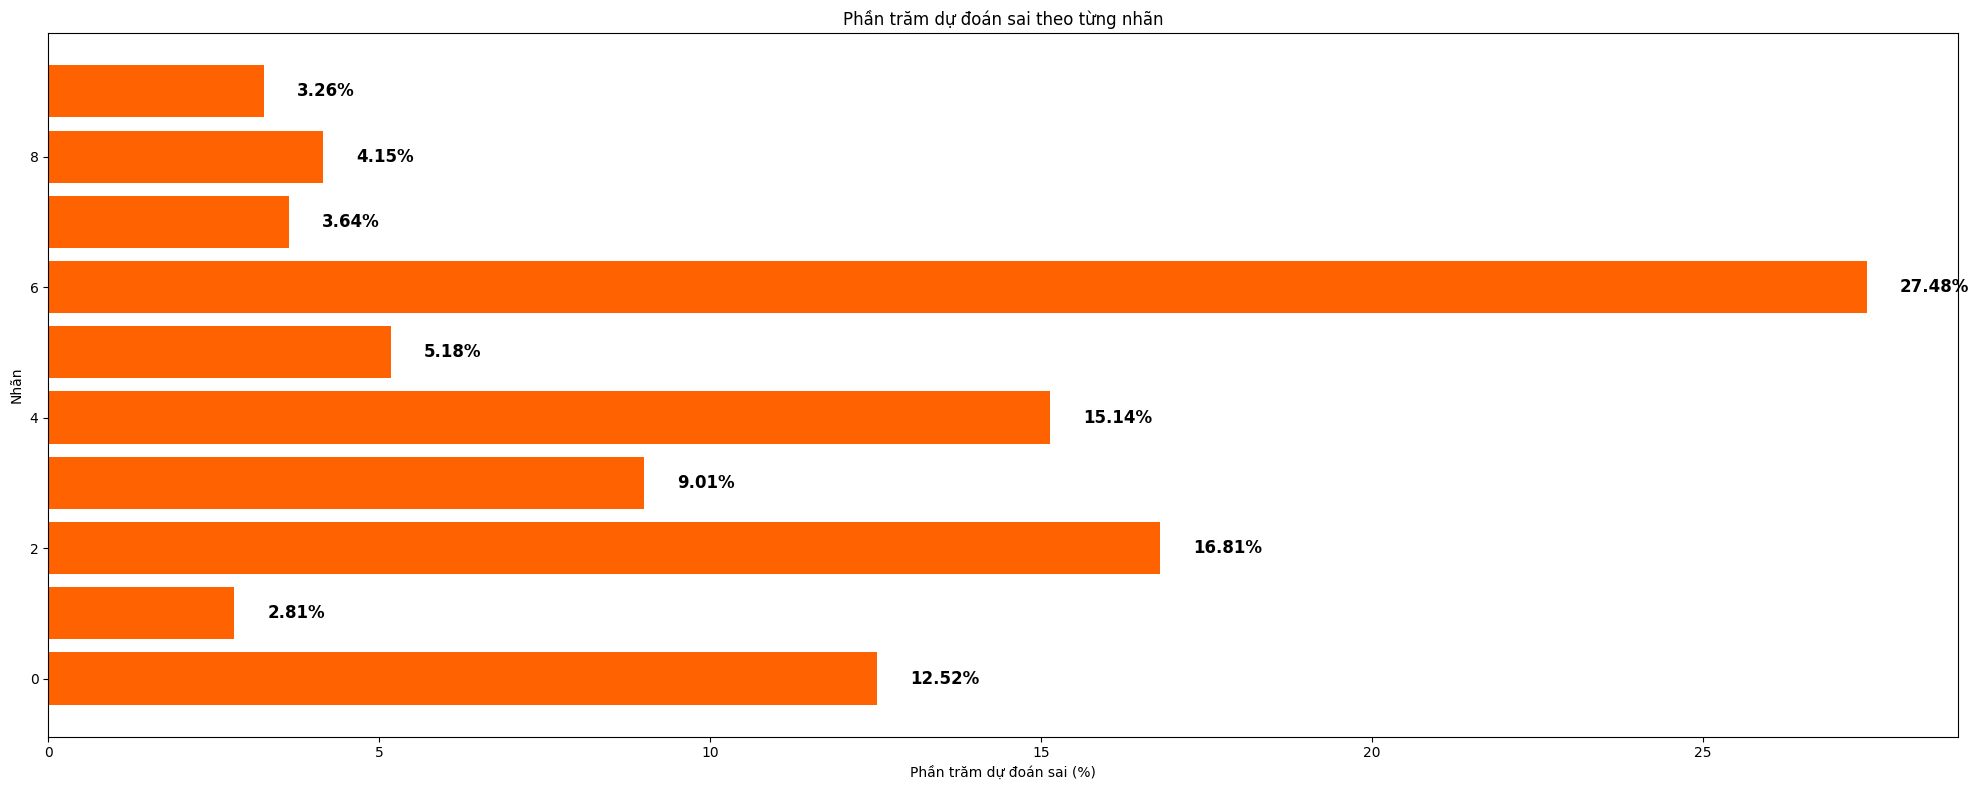

In [35]:
analyze_mismatches(y_test, y_pred_LG, X_test)

**MODEL SVM LINEAR**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Khởi tạo và huấn luyện mô hình SVM với kernel tuyến tính
start_time_SVM_L = time.time()
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_normalized, y_train)

# Dự đoán trên tập kiểm tra
y_pred_SVM_L = svm_model.predict(X_test_normalized)
end_time_LG= time.time()
# Đánh giá hiệu suất
accuracy = accuracy_score(y_test, y_pred_SVM_L)
report = classification_report(y_test, y_pred_SVM_L)

print(f"Độ chính xác của mô hình: {accuracy}")
print("Báo cáo phân loại:")
print(report)
time_SVM_L=end_time_LG - start_time_SVM_L
print(f'Thời gian chạy: {time_SVM_L} giây')


Độ chính xác của mô hình: 0.8454
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.77      0.75      1000
           3       0.85      0.84      0.84      1000
           4       0.76      0.77      0.77      1000
           5       0.93      0.93      0.93      1000
           6       0.63      0.56      0.59      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.92      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000

Thời gian chạy: 597.0572991371155 giây


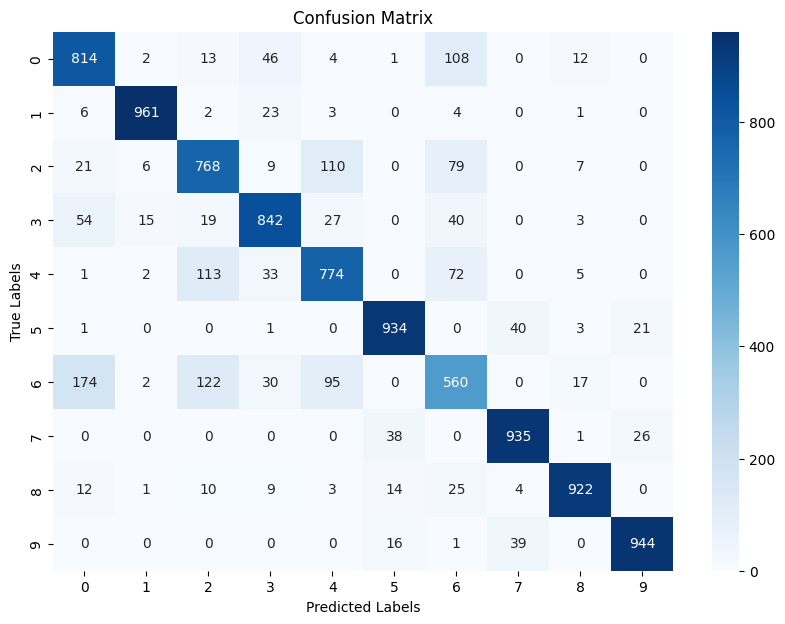

In [38]:
# Tạo confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVM_L)

# Vẽ confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Số lượng nhãn khác biệt bị dự đoán sai: 10
Các nhãn duy nhất bị dự đoán sai: [0 1 2 3 4 5 6 7 8 9]
Số lượng từng nhãn bị dự đoán sai: [186  39 232 158 226  66 440  65  78  56]


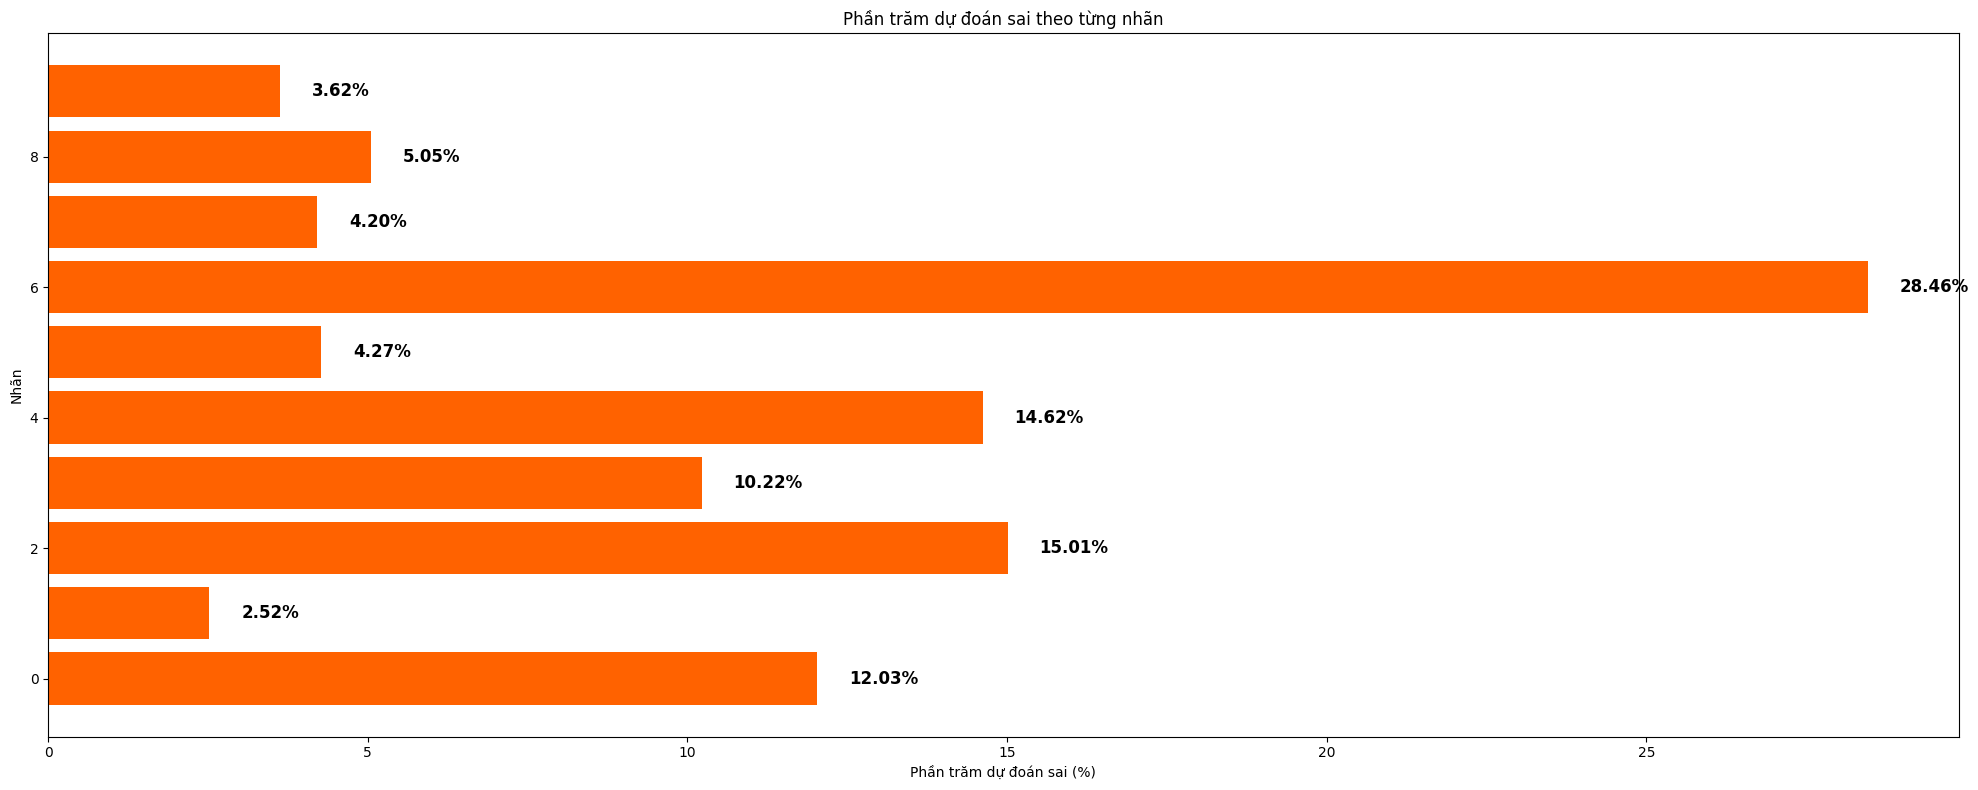

In [39]:
analyze_mismatches(y_test, y_pred_SVM_L, X_test)

**MODEL SVM KERNEL**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Khởi tạo mô hình SVM với kernel RBF
start_time_SVM_K=time.time()
model = SVC(kernel='rbf', gamma='scale')  # gamma='scale' tự động điều chỉnh gamma

# Huấn luyện mô hình
model.fit(X_train_normalized, y_train)

# Dự đoán trên tập kiểm tra
y_pred_brf = model.predict(X_test_normalized)
end_time_LG=time.time()
# Đánh giá mô hình
accuracy_brf = accuracy_score(y_test, y_pred_brf)
print(f"Độ chính xác: {accuracy_brf:.2f}")

# Hiển thị kết quả

print(classification_report(y_test, y_pred_brf))
time_SVM_K=end_time_LG - start_time_SVM_K
print(f'Thời gian chạy: {time_SVM_K} giây')


Độ chính xác: 0.88
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.66      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Thời gian chạy: 786.8657600879669 giây


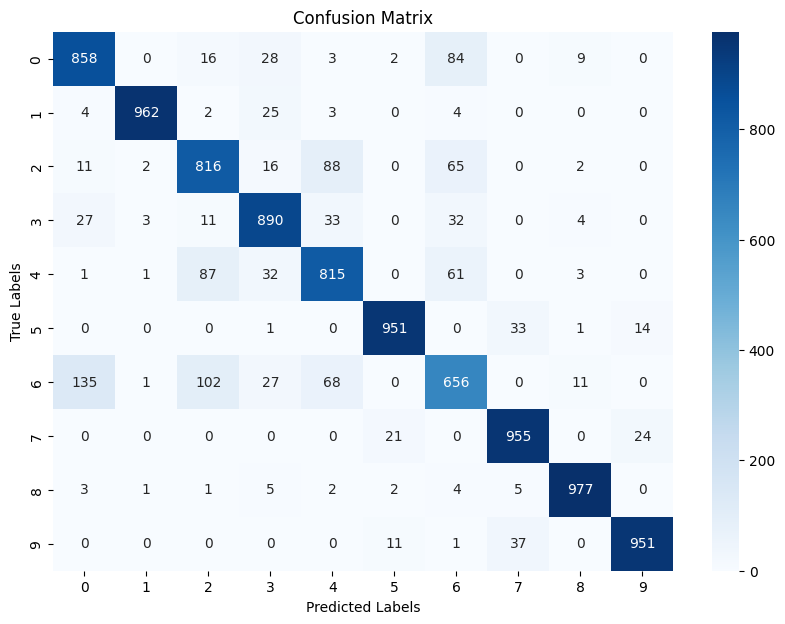

In [41]:
# Tạo confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_brf)

# Vẽ confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Số lượng nhãn khác biệt bị dự đoán sai: 10
Các nhãn duy nhất bị dự đoán sai: [0 1 2 3 4 5 6 7 8 9]
Số lượng từng nhãn bị dự đoán sai: [142  38 184 110 185  49 344  45  23  49]


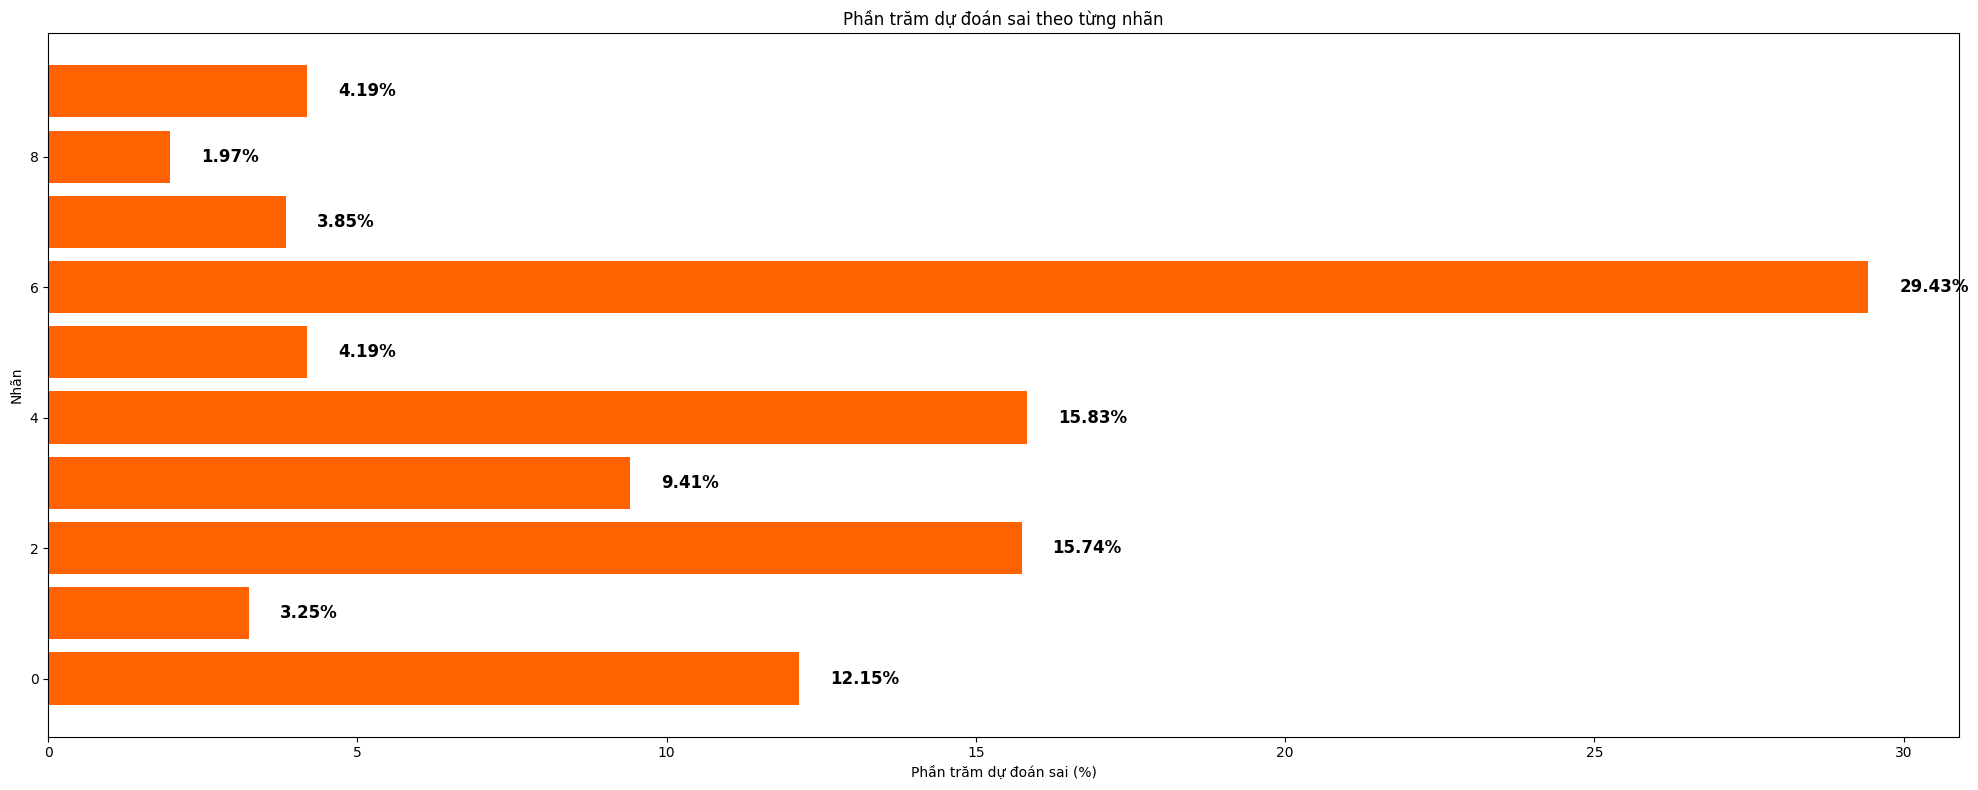

In [42]:
analyze_mismatches(y_test, y_pred_brf, X_test)

**PCA**

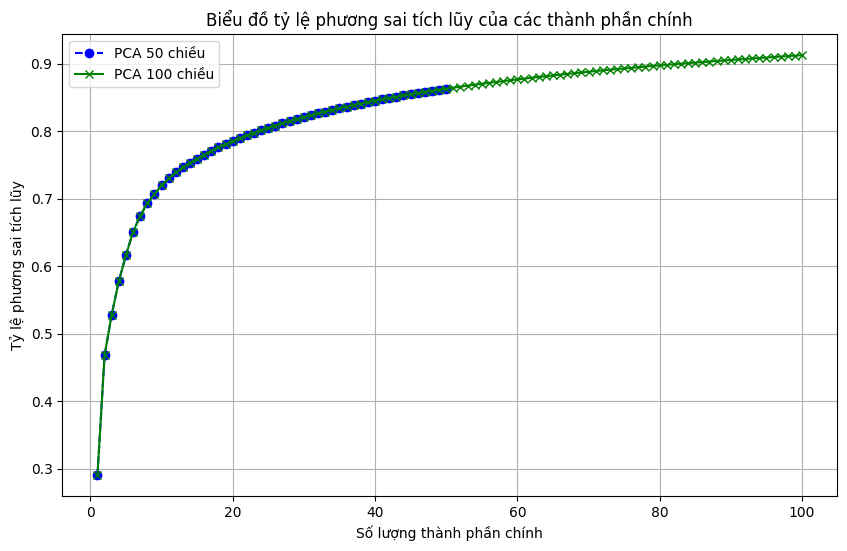

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# PCA với 50 thành phần chính
pca_50 = PCA(n_components=50)
pca_50.fit(X_train_normalized)
cumulative_variance_ratio_50 = np.cumsum(pca_50.explained_variance_ratio_)

# PCA với 100 thành phần chính
pca_100 = PCA(n_components=100)
pca_100.fit(X_train_normalized)
cumulative_variance_ratio_100 = np.cumsum(pca_100.explained_variance_ratio_)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), cumulative_variance_ratio_50, marker='o', linestyle='--', color='b', label='PCA 50 chiều')
plt.plot(range(1, 101), cumulative_variance_ratio_100, marker='x', linestyle='-', color='g', label='PCA 100 chiều')

plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Tỷ lệ phương sai tích lũy')
plt.title('Biểu đồ tỷ lệ phương sai tích lũy của các thành phần chính')
plt.legend()
plt.grid(True)
plt.show()


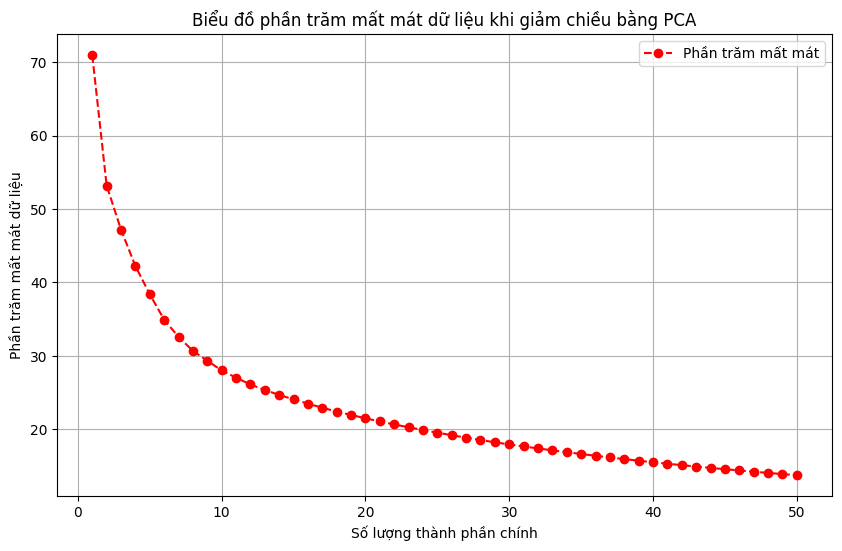

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Áp dụng PCA với số lượng thành phần lớn (ví dụ: 100) để quan sát
pca = PCA(n_components=50)
pca.fit(X_train_normalized)

# Tỷ lệ phương sai tích lũy
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_) * 100  # tính phần trăm giữ lại
data_loss_percentage = 100 - cumulative_variance_ratio  # phần trăm mất mát

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), data_loss_percentage, marker='o', linestyle='--', color='r', label='Phần trăm mất mát')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Phần trăm mất mát dữ liệu')
plt.title('Biểu đồ phần trăm mất mát dữ liệu khi giảm chiều bằng PCA')
plt.legend()
plt.grid(True)
plt.show()

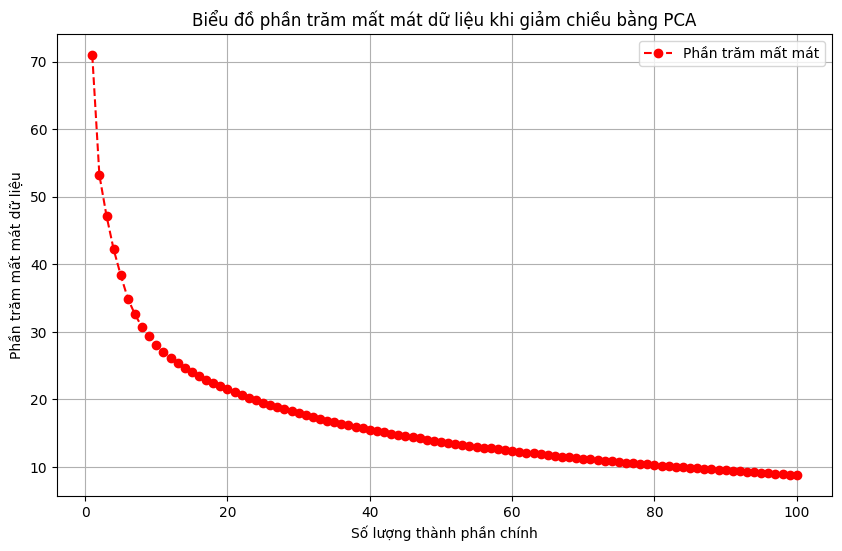

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Áp dụng PCA với số lượng thành phần lớn (ví dụ: 100) để quan sát
pca = PCA(n_components=100)
pca.fit(X_train_normalized)

# Tỷ lệ phương sai tích lũy
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_) * 100  # tính phần trăm giữ lại
data_loss_percentage = 100 - cumulative_variance_ratio  # phần trăm mất mát

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), data_loss_percentage, marker='o', linestyle='--', color='r', label='Phần trăm mất mát')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Phần trăm mất mát dữ liệu')
plt.title('Biểu đồ phần trăm mất mát dữ liệu khi giảm chiều bằng PCA')
plt.legend()
plt.grid(True)
plt.show()


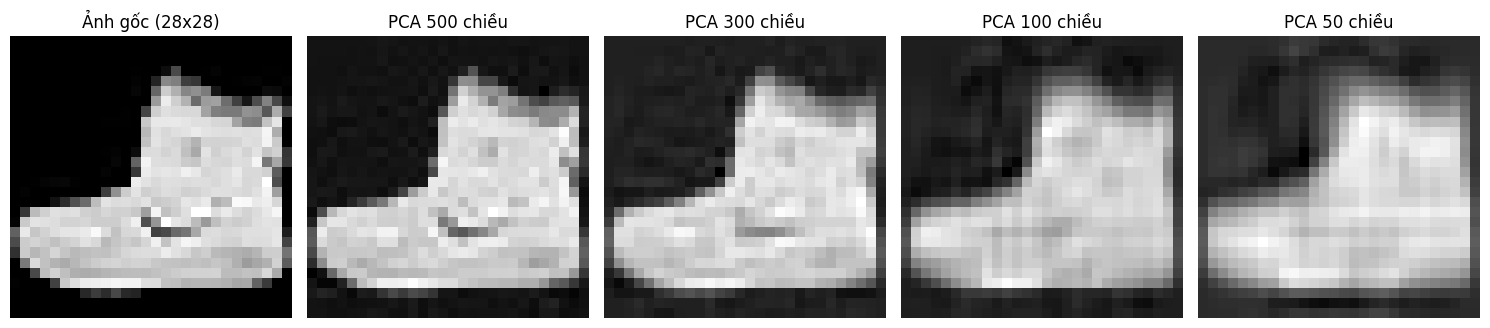

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_images_multiple_pca(X_train_normalized, sample_index=0):

    # Chọn một ảnh mẫu từ dữ liệu đã chuẩn hóa
    original_image = X_train_normalized[sample_index].reshape(28, 28)

    # Danh sách số lượng thành phần chính PCA
    components = [500, 300, 100, 50]
    reconstructed_images = []

    for n_components in components:
        # Giảm chiều với PCA
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_train_normalized)
        # Khôi phục lại ảnh
        reconstructed_image = pca.inverse_transform(X_pca[sample_index]).reshape(28, 28)
        reconstructed_images.append(reconstructed_image)

    # Hiển thị ảnh gốc và các ảnh sau khi giảm chiều
    plt.figure(figsize=(15, 4))

    # Ảnh gốc
    plt.subplot(1, len(components) + 1, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Ảnh gốc (28x28)")
    plt.axis('off')

    # Ảnh sau PCA với từng số chiều
    for i, (n_components, reconstructed_image) in enumerate(zip(components, reconstructed_images)):
        plt.subplot(1, len(components) + 1, i + 2)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title(f"PCA {n_components} chiều")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Giả sử bạn đã có X_train_normalized là dữ liệu chuẩn hóa của tập huấn luyện
display_images_multiple_pca(X_train_normalized, sample_index=0)


**LOGISTIC REGRESSION PCA 50 100**

In [47]:


# Giảm chiều dữ liệu xuống 50 chiều
start_time_50_LG = time.time()
pca_50 = PCA(n_components=50)
X_train_pca_50 = pca_50.fit_transform(X_train_normalized)
X_test_pca_50 = pca_50.transform(X_test_normalized)

# Khởi tạo và huấn luyện mô hình LogisticRegression trên dữ liệu 50 chiều
model_50_LG = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model_50_LG.fit(X_train_pca_50, y_train)

# Dự đoán và đánh giá
y_pred_pca_50_LG = model_50_LG.predict(X_test_pca_50)
end_time_50_LG = time.time()
accuracy_50 = accuracy_score(y_test, y_pred_pca_50_LG)
time_50_LG=end_time_50_LG - start_time_50_LG
print("Độ chính xác (PCA 50 chiều):", accuracy_50)
print(classification_report(y_test, y_pred_pca_50_LG))
print("thời gian chạy của pca 50 LG:", time_50_LG)



# Giảm chiều dữ liệu xuống 100 chiều
start_time_100_LG = time.time()
pca_100 = PCA(n_components=100)
X_train_pca_100 = pca_100.fit_transform(X_train_normalized)
X_test_pca_100 = pca_100.transform(X_test_normalized)

# Khởi tạo và huấn luyện mô hình LogisticRegression trên dữ liệu 100 chiều
model_100 = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model_100.fit(X_train_pca_100, y_train)

# Dự đoán và đánh giá
y_pred_pca_100_LG = model_100.predict(X_test_pca_100)
end_time_100_LG = time.time()
accuracy_100 = accuracy_score(y_test, y_pred_pca_100_LG)
time_100_LG=end_time_100_LG - start_time_100_LG
print("Độ chính xác (PCA 100 chiều):", accuracy_100)
print(classification_report(y_test, y_pred_pca_100_LG))
print("thời gian chạy của pca 100 LG:", time_100_LG)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Độ chính xác (PCA 50 chiều): 0.8288
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.70      0.71      1000
           3       0.81      0.86      0.84      1000
           4       0.71      0.73      0.72      1000
           5       0.94      0.91      0.93      1000
           6       0.57      0.54      0.55      1000
           7       0.89      0.92      0.91      1000
           8       0.93      0.93      0.93      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

thời gian chạy của pca 50 LG: 22.059232234954834


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Độ chính xác (PCA 100 chiều): 0.8408
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.72      0.73      0.73      1000
           3       0.82      0.87      0.85      1000
           4       0.72      0.75      0.73      1000
           5       0.94      0.93      0.94      1000
           6       0.61      0.55      0.58      1000
           7       0.91      0.93      0.92      1000
           8       0.94      0.94      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

thời gian chạy của pca 100 LG: 30.694264888763428


**SVM LINEAR SAU KHI PCA 50 100**

In [48]:
# Giảm chiều dữ liệu xuống 50 chiều
start_time_50_SVM_L = time.time()
pca_50 = PCA(n_components=50)
X_train_pca_50 = pca_50.fit_transform(X_train_normalized)
X_test_pca_50 = pca_50.transform(X_test_normalized)

# Khởi tạo và huấn luyện mô hình LogisticRegression trên dữ liệu 50 chiều
model_50_SVM_L = SVC(kernel='linear')
model_50_SVM_L.fit(X_train_pca_50, y_train)

# Dự đoán và đánh giá
y_pred_pca_50_SVM_L = model_50_SVM_L.predict(X_test_pca_50)
end_time_50_SVM_L = time.time()
accuracy_50_SVM_L = accuracy_score(y_test, y_pred_pca_50_SVM_L)
time_50_SVM_L=end_time_50_SVM_L - start_time_50_SVM_L
print("Độ chính xác (PCA 50 chiều):", accuracy_50_SVM_L)
print(classification_report(y_test, y_pred_pca_50_SVM_L))
print("thời gian chạy của pca 50 LG:", time_50_SVM_L)



# Giảm chiều dữ liệu xuống 50 chiều
start_time_100_SVM_L = time.time()
pca_100 = PCA(n_components=100)
X_train_pca_100 = pca_100.fit_transform(X_train_normalized)
X_test_pca_100 = pca_100.transform(X_test_normalized)

# Khởi tạo và huấn luyện mô hình LogisticRegression trên dữ liệu 50 chiều
model_100_SVM_L = SVC(kernel='linear')
model_100_SVM_L.fit(X_train_pca_100, y_train)

# Dự đoán và đánh giá
y_pred_pca_100_SVM_L = model_100_SVM_L.predict(X_test_pca_100)
end_time_100_SVM_L = time.time()
accuracy_100_SVM_L = accuracy_score(y_test, y_pred_pca_100_SVM_L)
time_100_SVM_L=end_time_100_SVM_L - start_time_100_SVM_L
print("Độ chính xác (PCA 100 chiều):", accuracy_100_SVM_L)
print(classification_report(y_test, y_pred_pca_100_SVM_L))
print("thời gian chạy của pca 100 LG:", time_100_SVM_L)



Độ chính xác (PCA 50 chiều): 0.8362
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.97      0.95      0.96      1000
           2       0.73      0.72      0.73      1000
           3       0.84      0.87      0.85      1000
           4       0.73      0.74      0.73      1000
           5       0.94      0.92      0.93      1000
           6       0.60      0.55      0.57      1000
           7       0.90      0.93      0.92      1000
           8       0.94      0.95      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.84     10000
weighted avg       0.83      0.84      0.84     10000

thời gian chạy của pca 50 LG: 105.75412487983704
Độ chính xác (PCA 100 chiều): 0.8497
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
          

**SVM KERNEL SAU KHI PCA 50 100**

In [49]:

# Giảm chiều dữ liệu xuống 50 chiều
start_time_50_SVM_K = time.time()
pca_50 = PCA(n_components=50)
X_train_pca_50 = pca_50.fit_transform(X_train_normalized)
X_test_pca_50 = pca_50.transform(X_test_normalized)

# Khởi tạo và huấn luyện mô hình LogisticRegression trên dữ liệu 50 chiều
model_50_SVM_K = SVC(kernel='rbf', gamma='scale')
model_50_SVM_K.fit(X_train_pca_50, y_train)

# Dự đoán và đánh giá
y_pred_pca_50_SVM_K = model_50_SVM_K.predict(X_test_pca_50)
end_time_50_SVM_K = time.time()
accuracy_50_SVM_K = accuracy_score(y_test, y_pred_pca_50_SVM_K)
time_50_SVM_K=end_time_50_SVM_K - start_time_50_SVM_K
print("Độ chính xác (PCA 50 chiều):", accuracy_50_SVM_K)
print(classification_report(y_test, y_pred_pca_50_SVM_K))
print("thời gian chạy của pca 50 LG:", time_50_SVM_K)



# Giảm chiều dữ liệu xuống 50 chiều
start_time_100_SVM_K = time.time()
pca_100 = PCA(n_components=100)
X_train_pca_100 = pca_100.fit_transform(X_train_normalized)
X_test_pca_100 = pca_100.transform(X_test_normalized)

# Khởi tạo và huấn luyện mô hình LogisticRegression trên dữ liệu 50 chiều
model_100_SVM_K = SVC(kernel='linear')
model_100_SVM_K.fit(X_train_pca_100, y_train)

# Dự đoán và đánh giá
y_pred_pca_100_SVM_K = model_100_SVM_K.predict(X_test_pca_100)
end_time_100_SVM_K = time.time()
accuracy_100_SVM_K = accuracy_score(y_test, y_pred_pca_100_SVM_K)
time_100_SVM_K=end_time_100_SVM_K - start_time_100_SVM_K
print("Độ chính xác (PCA 100 chiều):", accuracy_100_SVM_K)
print(classification_report(y_test, y_pred_pca_100_SVM_K))
print("thời gian chạy của pca 100 LG:", time_100_SVM_K)

Độ chính xác (PCA 50 chiều): 0.875
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.96      0.97      1000
           2       0.78      0.79      0.78      1000
           3       0.87      0.89      0.88      1000
           4       0.79      0.81      0.80      1000
           5       0.97      0.94      0.95      1000
           6       0.69      0.65      0.67      1000
           7       0.92      0.94      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000

thời gian chạy của pca 50 LG: 86.06842494010925
Độ chính xác (PCA 100 chiều): 0.8497
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1

In [52]:
LG_o=accuracy_score(y_test, y_pred_LG)
LG_o_50=accuracy_score(y_test,y_pred_pca_50_LG)
LG_o_100=accuracy_score(y_test,y_pred_pca_100_LG)

In [55]:
svm_o_L=accuracy_score(y_test, y_pred_SVM_L)
svm_o_50_L=accuracy_score(y_test, y_pred_pca_50_SVM_L)
svm_o_100_L=accuracy_score(y_test, y_pred_pca_100_SVM_L)

In [59]:
svm_o_K=accuracy_score(y_test, y_pred_brf)
svm_o_50_K=accuracy_score(y_test, y_pred_pca_50_SVM_K)
svm_o_100_K=accuracy_score(y_test, y_pred_pca_100_SVM_K)

In [62]:
time_LG
time_50_LG
time_100_LG
time_SVM_L
time_50_SVM_L
time_100_SVM_L
time_SVM_K
time_50_SVM_K
time_100_SVM_K

153.02149724960327

In [61]:
import pandas as pd

# Giả sử các giá trị accuracy score đã được tính toán
chiadulieu = {
    'Model': ['LG', 'LG_o_50', 'LG_o_100', 'svm_o_L', 'svm_o_50_L', 'svm_o_100_L', 'svm_o_K', 'svm_o_50_K', 'svm_o_100_K'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_LG),
        accuracy_score(y_test, y_pred_pca_50_LG),
        accuracy_score(y_test, y_pred_pca_100_LG),
        accuracy_score(y_test, y_pred_SVM_L),
        accuracy_score(y_test, y_pred_pca_50_SVM_L),
        accuracy_score(y_test, y_pred_pca_100_SVM_L),
        accuracy_score(y_test, y_pred_brf),
        accuracy_score(y_test, y_pred_pca_50_SVM_K),
        accuracy_score(y_test, y_pred_pca_100_SVM_K)
    ]
}

# Tạo DataFrame
tongquat = pd.DataFrame(chiadulieu)

print(tongquat)


         Model  Accuracy
0           LG    0.8435
1      LG_o_50    0.8288
2     LG_o_100    0.8408
3      svm_o_L    0.8454
4   svm_o_50_L    0.8362
5  svm_o_100_L    0.8497
6      svm_o_K    0.8831
7   svm_o_50_K    0.8750
8  svm_o_100_K    0.8497


In [66]:
import pandas as pd

# Dữ liệu giả định cho độ chính xác và thời gian
data_accu = {
    'Model': ['Logistic Regression', 'SVM Linear', 'SVM Kernel'],
    'Accuracy Initial': [LG_o, svm_o_L,svm_o_K],  # Độ chính xác lúc ban đầu
    'Accuracy PCA 50': [LG_o_50,svm_o_50_L, svm_o_50_K],    # Độ chính xác sau khi PCA 50 chiều
    'Accuracy PCA 100': [LG_o_100, svm_o_100_L, svm_o_100_K],   # Độ chính xác sau khi PCA 100 chiều

}

# Tạo DataFrame
df_accu = pd.DataFrame(data_accu)



In [67]:
df_accu

,Model,Accuracy Initial,Accuracy PCA 50,Accuracy PCA 100
0,Logistic Regression,0.8435,0.8288,0.8408
1,SVM Linear,0.8454,0.8362,0.8497
2,SVM Kernel,0.8831,0.8750,0.8497


In [68]:
# Dữ liệu giả định cho độ chính xác và thời gian
data_time = {
    'Model': ['Logistic Regression', 'SVM Linear', 'SVM Kernel'],
    'Time Initial': [time_LG, time_SVM_L,time_SVM_K],  # Độ chính xác lúc ban đầu
    'Time PCA 50': [time_50_LG,time_50_SVM_L, time_50_SVM_K],    # Độ chính xác sau khi PCA 50 chiều
    'Time PCA 100': [time_100_LG, time_100_SVM_L, time_100_SVM_K],   # Độ chính xác sau khi PCA 100 chiều

}

# Tạo DataFrame
df_time = pd.DataFrame(data_time)

**Mạng mình lag nên độ chính xác về thời gian chưa chắc chắn**

In [69]:
df_time

,Model,Time Initial,Time PCA 50,Time PCA 100
0,Logistic Regression,131.488973,22.059232,30.694265
1,SVM Linear,597.057299,105.754125,160.139483
2,SVM Kernel,786.865760,86.068425,153.021497
